In [1]:
import pandas as pd
import numpy as np 
import time 
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
#引入数据集
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()
print(housing.data.shape)
print(housing.target.shape)

(20640, 8)
(20640,)


### **一、切分数据集**

In [3]:
from sklearn.model_selection import train_test_split
x_train_all,x_test,y_train_all,y_test=train_test_split(housing.data,housing.target,random_state=7)
x_train,x_valid,y_train,y_valid=train_test_split(x_train_all,y_train_all,random_state=11)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
print(x_valid.shape,y_valid.shape)

(11610, 8) (11610,)
(5160, 8) (5160,)
(3870, 8) (3870,)


### **二、特征工程**

In [4]:
#归一化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_valid_scaled=scaler.transform(x_valid)
x_test_scaled=scaler.transform(x_test)

### **三、模型搭建**

In [5]:
#创建模型
model=keras.models.Sequential([
    #30表示该层神经元的个数，
    #activation是激活函数，
    #input_shape定义第一层（shape要和数据集的shaoe一致）
    #input_shape的结构列数一定要和数据集一致，函数可以选择None或者1
    keras.layers.Dense(30,activation='relu',input_shape=x_train.shape[1:8]),
    #第二层,只含有一个神经元
    keras.layers.Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                270       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [6]:
#解读
#当层param的数量=(每一层神经元数量*特征数量)+(1*特征数量)
#Total params=每层的参数相加

In [7]:
#编译模型
#loss是定义损失函数为MSE
#optimizer是优化器，相当于是告诉计算机如何求解损失函数，这里使用的是梯度下降法迭代
model.compile(loss='mean_squared_error',optimizer='sgd')
#回调函数
#当指标在运行中没有提升，就提前停止训练
callbacks=[keras.callbacks.EarlyStopping(patience=5,min_delta=1e-2)]

In [8]:
#运行fit函数
history=model.fit(x_train_scaled,y_train,validation_data=(x_valid_scaled,y_valid),epochs=100,callbacks=callbacks)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.4604 - val_loss: 0.5554
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4334 - val_loss: 0.4203
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3984 - val_loss: 0.4164
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3893 - val_loss: 0.4079
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3862 - val_loss: 0.3921
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3790 - val_loss: 0.3847
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3782 - val_loss: 0.3848
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3830 - val_loss: 0.3953
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3775 - val_loss: 0.3784
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3689 - val_lo

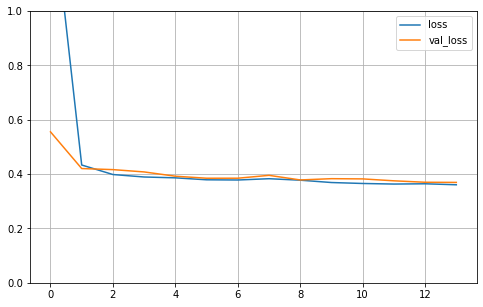

In [9]:
#绘制学习曲线
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

In [10]:
model.evaluate(x_test_scaled,y_test)

162/162 [==============================] - 0s 960us/step - loss: 0.3780


0.37801289558410645